In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 6

In [42]:
df_raw = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_171125.txt')

In [47]:
df = pd.read_csv('final_dataset-2.csv')
df.head()

STATION        Date  TIMEINT     ENTRIES  Clear  Fog  Haze  Heavy Rain  \
0    1 AV  2016-01-01        1  1407774726   0.00  0.0   0.0         0.0   
1    1 AV  2016-01-01        2  1407775796   0.00  0.0   0.0         0.0   
2    1 AV  2016-01-01        3  1407776768   0.00  0.0   0.0         0.0   
3    1 AV  2016-01-01        4  1407779799   0.00  0.0   0.0         0.0   
4    1 AV  2016-01-01        5  1407783611   0.75  0.0   0.0         0.0   

   Heavy Snow  Humidity     ...       Light Freezing Rain  Light Rain  \
0         0.0     53.50     ...                       0.0         0.0   
1         0.0     58.25     ...                       0.0         0.0   
2         0.0     53.50     ...                       0.0         0.0   
3         0.0     49.25     ...                       0.0         0.0   
4         0.0     48.50     ...                       0.0         0.0   

   Light Snow  Mostly Cloudy  Overcast  Partly Cloudy  Rain  Scattered Clouds  \
0         0.0            0.0      1.00           0.00   0.0               0.0   
1         0.0            0.0      1.00           0.00   0.0               0.0   
2         0.0            0.0      0.75           0.25   0.0               0.0   
3         0.0            0.0      1.00           0.00   0.0               0.0   
4         0.0            0.0      0.00           0.25   0.0               0.0   

   Snow  Temperature  
0   0.0       41.275  
1   0.0       39.450  
2   0.0       39.675  
3   0.0       39.450  
4   0.0       37.450  

[5 rows x 21 columns]

In [6]:
newdf = pd.read_csv('new_MTAturnstile.csv')
newdf.head(12)

STATION        DATE  TIMEINT  ENTRIES_hourly
0     1 AV  01/01/2016        1          3056.0
1     1 AV  01/01/2016        2          1070.0
2     1 AV  01/01/2016        3           972.0
3     1 AV  01/01/2016        4          3031.0
4     1 AV  01/01/2016        5          3812.0
5     1 AV  01/01/2016        6          3241.0
6     1 AV  01/02/2016        1          1780.0
7     1 AV  01/02/2016        2           319.0
8     1 AV  01/02/2016        3          1607.0
9     1 AV  01/02/2016        4          3904.0
10    1 AV  01/02/2016        5          4463.0
11    1 AV  01/02/2016        6          4132.0

In [7]:
newdf['datetime'] = pd.to_datetime(newdf.DATE)
newdf['datetime'] += pd.to_timedelta((newdf.TIMEINT - 1)*4, 'h')
newdf.set_index('datetime', inplace=True)
newdf.head()

STATION        DATE  TIMEINT  ENTRIES_hourly
datetime                                                        
2016-01-01 00:00:00    1 AV  01/01/2016        1          3056.0
2016-01-01 04:00:00    1 AV  01/01/2016        2          1070.0
2016-01-01 08:00:00    1 AV  01/01/2016        3           972.0
2016-01-01 12:00:00    1 AV  01/01/2016        4          3031.0
2016-01-01 16:00:00    1 AV  01/01/2016        5          3812.0

df['datetime'] = pd.to_datetime(df.Date)
df['datetime'] += pd.to_timedelta((df.TIMEINT - 1)*4, 'h')
df.set_index('datetime', inplace=True)
df.head()

In [126]:
len(newdf.STATION.unique())

AttributeError: 'DataFrame' object has no attribute 'STATION'

In [50]:
nonconditions = ['Date', 'STATION', 'TIMEINT', 'ENTRIES', 'Temperature', 'Humidity']
conditions = df.drop(nonconditions, axis=1).columns
conditions

Index([u'Clear', u'Fog', u'Haze', u'Heavy Rain', u'Heavy Snow',
       u'Light Freezing Fog', u'Light Freezing Rain', u'Light Rain',
       u'Light Snow', u'Mostly Cloudy', u'Overcast', u'Partly Cloudy', u'Rain',
       u'Scattered Clouds', u'Snow'],
      dtype='object')

In [51]:
nonconditions = ['Date', 'STATION', 'TIMEINT', 'ENTRIES', 'Temperature', 'Humidity']
conditions = df.drop(nonconditions, axis=1).columns
conditions

Index([u'Clear', u'Fog', u'Haze', u'Heavy Rain', u'Heavy Snow',
       u'Light Freezing Fog', u'Light Freezing Rain', u'Light Rain',
       u'Light Snow', u'Mostly Cloudy', u'Overcast', u'Partly Cloudy', u'Rain',
       u'Scattered Clouds', u'Snow'],
      dtype='object')

In [52]:
# Merge the weather conditions
df['Rain'] += df['Heavy Rain'] + df['Light Rain'] + df['Light Freezing Rain']
df['Snow'] += df['Heavy Snow'] + df['Light Snow']
df['Cloudy'] = (df['Partly Cloudy'] + df['Scattered Clouds'] + df['Mostly Cloudy']
                + df['Overcast'] + df['Fog'] + df['Haze'] + df['Light Freezing Fog'])

# Get rid of columns that we don't want
df = df.drop([c for c in conditions if c not in ['Rain', 'Snow', 'Cloudy', 'Clear']], axis=1)

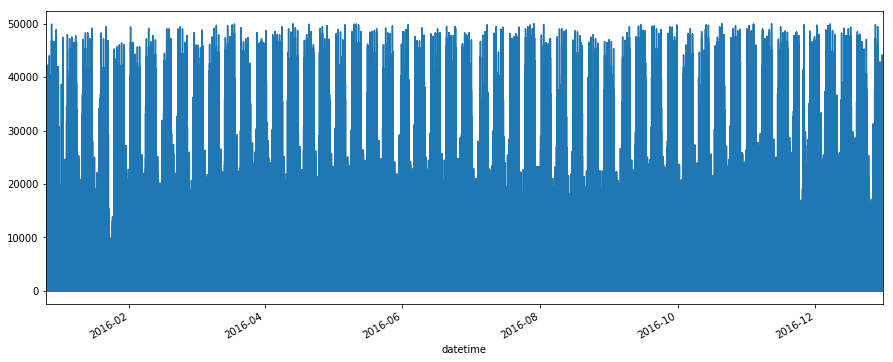

In [8]:
newdf['ENTRIES_hourly'].plot()

In [54]:
set(df.columns) - set(nonconditions)

{'Clear', 'Cloudy', 'Rain', 'Snow'}

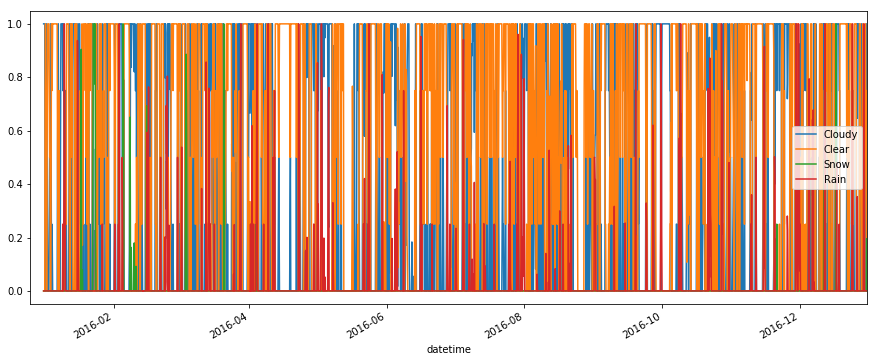

In [55]:
df[list(set(df.columns) - set(nonconditions))].plot()

In [9]:
newdf.head()

STATION        DATE  TIMEINT  ENTRIES_hourly
datetime                                                        
2016-01-01 00:00:00    1 AV  01/01/2016        1          3056.0
2016-01-01 04:00:00    1 AV  01/01/2016        2          1070.0
2016-01-01 08:00:00    1 AV  01/01/2016        3           972.0
2016-01-01 12:00:00    1 AV  01/01/2016        4          3031.0
2016-01-01 16:00:00    1 AV  01/01/2016        5          3812.0

In [10]:
newdf = newdf.reset_index().set_index(['STATION', 'datetime'])
newdf.head()

DATE  TIMEINT  ENTRIES_hourly
STATION datetime                                                
1 AV    2016-01-01 00:00:00  01/01/2016        1          3056.0
        2016-01-01 04:00:00  01/01/2016        2          1070.0
        2016-01-01 08:00:00  01/01/2016        3           972.0
        2016-01-01 12:00:00  01/01/2016        4          3031.0
        2016-01-01 16:00:00  01/01/2016        5          3812.0

In [130]:
df = df.reset_index().set_index(['STATION', 'datetime'])
df.head()

Date  TIMEINT     ENTRIES  Clear  Humidity  \
STATION datetime                                                                
1 AV    2016-01-01 00:00:00  2016-01-01        1  1407774726   0.00     53.50   
        2016-01-01 04:00:00  2016-01-01        2  1407775796   0.00     58.25   
        2016-01-01 08:00:00  2016-01-01        3  1407776768   0.00     53.50   
        2016-01-01 12:00:00  2016-01-01        4  1407779799   0.00     49.25   
        2016-01-01 16:00:00  2016-01-01        5  1407783611   0.75     48.50   

                             Rain  Snow  Temperature  Cloudy  
STATION datetime                                              
1 AV    2016-01-01 00:00:00   0.0   0.0       41.275    1.00  
        2016-01-01 04:00:00   0.0   0.0       39.450    1.00  
        2016-01-01 08:00:00   0.0   0.0       39.675    1.00  
        2016-01-01 12:00:00   0.0   0.0       39.450    1.00  
        2016-01-01 16:00:00   0.0   0.0       37.450    0.25

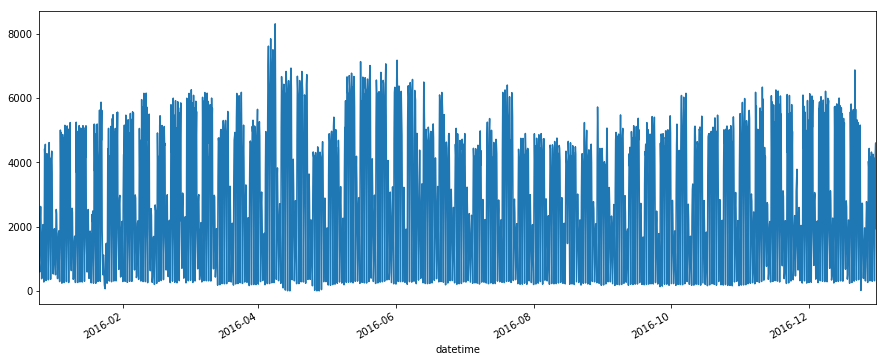

In [11]:
newdf.loc['3 AV-149 ST']['ENTRIES_hourly'].plot()

In [136]:
newdf.index.get_level_values(0).unique()[:150]

Index([u'1 AV', u'103 ST', u'103 ST-CORONA', u'104 ST', u'110 ST', u'111 ST',
       u'116 ST', u'116 ST-COLUMBIA', u'121 ST', u'125 ST',
       ...
       u'BEACH 36 ST', u'BEACH 44 ST', u'BEACH 60 ST', u'BEACH 67 ST',
       u'BEACH 90 ST', u'BEACH 98 ST', u'BEDFORD AV', u'BEDFORD PK BLVD',
       u'BEDFORD-NOSTRAN', u'BERGEN ST'],
      dtype='object', name=u'STATION', length=150)

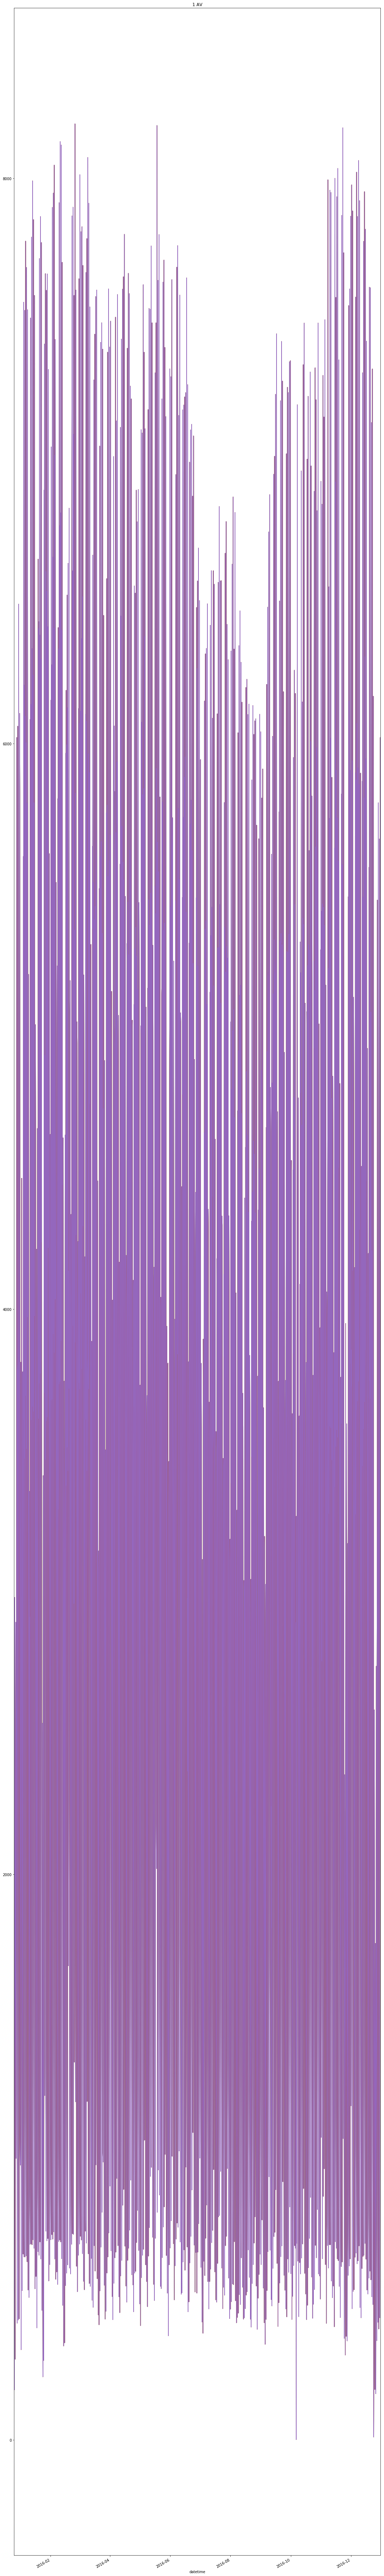

In [12]:
fig= plt.figure(figsize=(15,100))
count = 1
for level in newdf.index.get_level_values(0)[:5]:
    newdf.loc[level]['ENTRIES_hourly'].plot()
    plt.title(level)
    count += 1
plt.tight_layout()

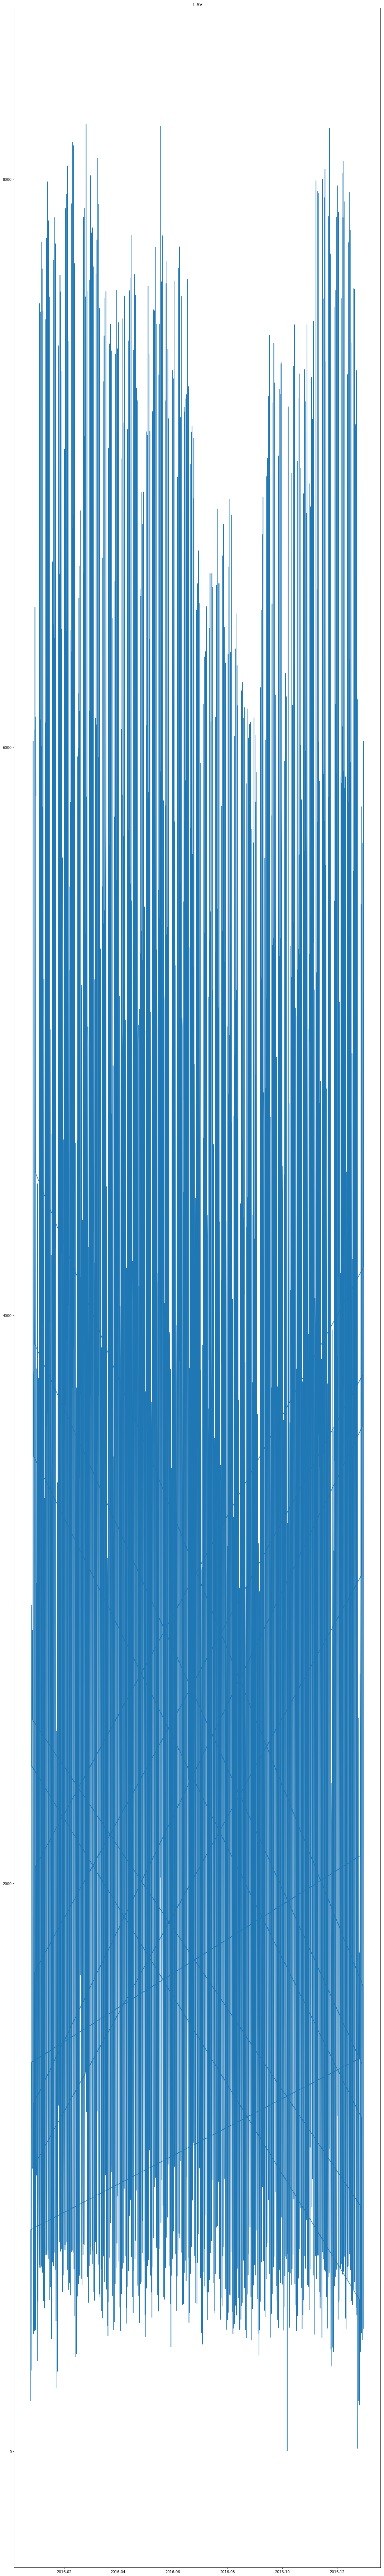

In [143]:
fig= plt.figure(figsize=(15,100))
count = 1
for level in newdf.index.get_level_values(0).unique()[:1]:
    ax = fig.add_subplot(len(newdf.index.get_level_values(0).unique()[:1]),1,count)
    ax.plot(newdf.loc[level]['ENTRIES_hourly'])
    ax.set_title(level)
    count += 1
plt.tight_layout()

In [ ]:
fig= plt.figure(figsize=(15,100))
count = 1
for level in newdf.index.get_level_values(0).unique()[150:]:
    
    ax = fig.add_subplot(len(newdf.index.get_level_values(0).unique()[150:]),1,count)
    ax.plot(newdf.loc[level]['ENTRIES_hourly'])
    ax.set_title(level)
    count += 1
plt.tight_layout()

for week in df.groupby(pd.TimeGrouper('w')):

In [60]:
df.head(3)

Date  TIMEINT     ENTRIES  Clear  Humidity  \
STATION datetime                                                                
1 AV    2016-01-01 00:00:00  2016-01-01        1  1407774726    0.0     53.50   
        2016-01-01 04:00:00  2016-01-01        2  1407775796    0.0     58.25   
        2016-01-01 08:00:00  2016-01-01        3  1407776768    0.0     53.50   

                             Rain  Snow  Temperature  Cloudy  
STATION datetime                                              
1 AV    2016-01-01 00:00:00   0.0   0.0       41.275     1.0  
        2016-01-01 04:00:00   0.0   0.0       39.450     1.0  
        2016-01-01 08:00:00   0.0   0.0       39.675     1.0

In [62]:
fourdf = df.reset_index()[['STATION','datetime','ENTRIES']]
fourdf.STATION.describe()

count     113776
unique        56
top       111 ST
freq        2226
Name: STATION, dtype: object

In [87]:
365*4
a = []
for name in fourdf.STATION.unique():
    a.append(fourdf[fourdf.STATION == name].datetime.unique().shape)
a

[(1987,),
 (2094,),
 (1987,),
 (1988,),
 (1988,),
 (2226,),
 (2093,),
 (2091,),
 (1988,),
 (2226,),
 (2221,),
 (2065,),
 (1986,),
 (2226,),
 (2093,),
 (1988,),
 (1988,),
 (2226,),
 (1988,),
 (2092,),
 (2092,),
 (1988,),
 (2085,),
 (1988,),
 (1989,),
 (1989,),
 (2226,),
 (2092,),
 (1988,),
 (1988,),
 (1984,),
 (2226,),
 (1988,),
 (2226,),
 (1987,),
 (1983,),
 (1987,),
 (1984,),
 (1988,),
 (2225,),
 (1982,),
 (2083,),
 (1987,),
 (1986,),
 (2089,),
 (2088,),
 (2226,),
 (1976,),
 (2081,),
 (2089,),
 (2087,),
 (1988,),
 (2226,),
 (1988,),
 (2090,),
 (266,)]

In [66]:
fourdf.datetime.unique().shape

(2226,)

In [17]:
newdf1 = newdf.reset_index()
newdf1.head()

STATION            datetime        DATE  TIMEINT  ENTRIES_hourly
0    1 AV 2016-01-01 00:00:00  01/01/2016        1          3056.0
1    1 AV 2016-01-01 04:00:00  01/01/2016        2          1070.0
2    1 AV 2016-01-01 08:00:00  01/01/2016        3           972.0
3    1 AV 2016-01-01 12:00:00  01/01/2016        4          3031.0
4    1 AV 2016-01-01 16:00:00  01/01/2016        5          3812.0

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


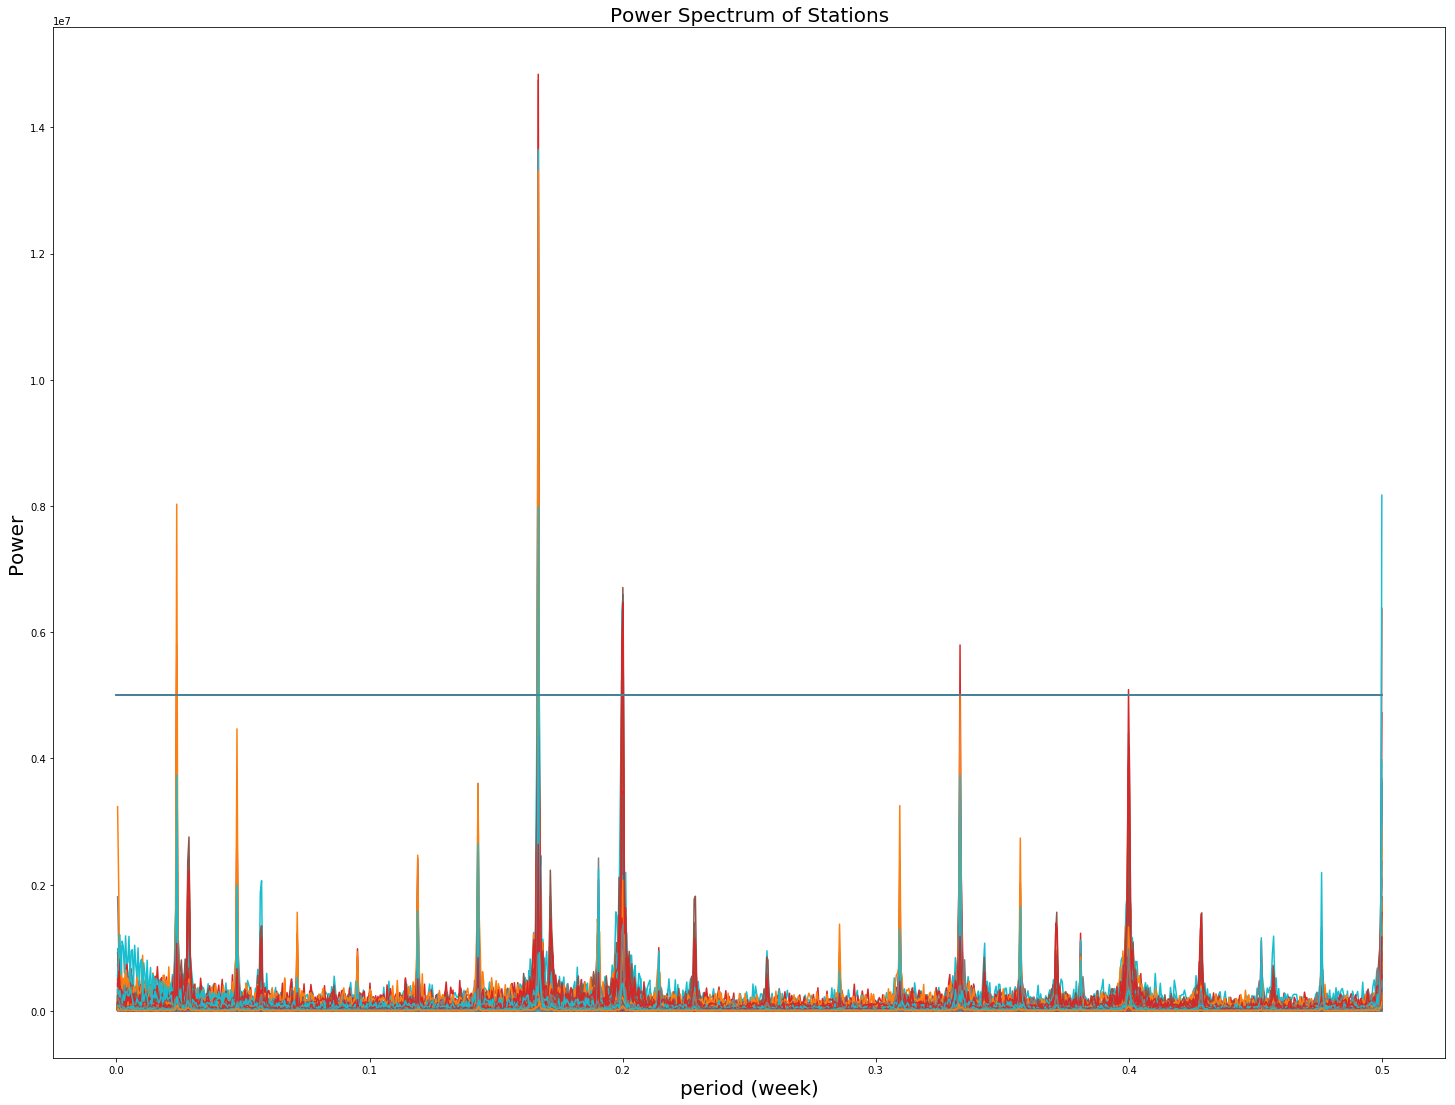

In [33]:
#N = len(fourdf.Date.unique())

fig=plt.figure(figsize=(20,15))
#ax=fig.add_subplot(111)
#num = len(newdf.STATION.unique())
count = 1
for name in newdf1.STATION.unique():#600 stations
    #ax = fig.add_subplot(5,1,count)
    N = len(newdf1[newdf1.STATION == name].datetime.unique())
    f = np.abs(np.fft.rfft(newdf1[newdf1.STATION == name].ENTRIES_hourly))
#    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), 'o')
    plt.plot([0,0.5],[5*1e6,5*1e6],"-")
    plt.plot(np.fft.rfftfreq(N, 1.0)[1:], (f[1:]), '-')
    count +=1
plt.tight_layout()

# changing the labels on the x ticks to see the period instead of frequency
ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
plt.xlabel("period (week)", fontsize=20)
plt.ylabel("Power", fontsize=20)
plt.title("Power Spectrum of Stations", fontsize=20)
plt.show();

In [64]:
TopPeriod = []
for name in newdf1.STATION.unique():#600 stations
    #ax = fig.add_subplot(5,1,count)
    #N = len(newdf1[newdf1.STATION == name].datetime.unique())
    f = np.abs(np.fft.rfft(newdf1[newdf1.STATION == name].ENTRIES_hourly))
    #f = np.abs(np.fft.rfft(typ_allsum[i]))
    if max(f) > 1.45*1e7: # inspect visually
        TopPeriod.append(f)

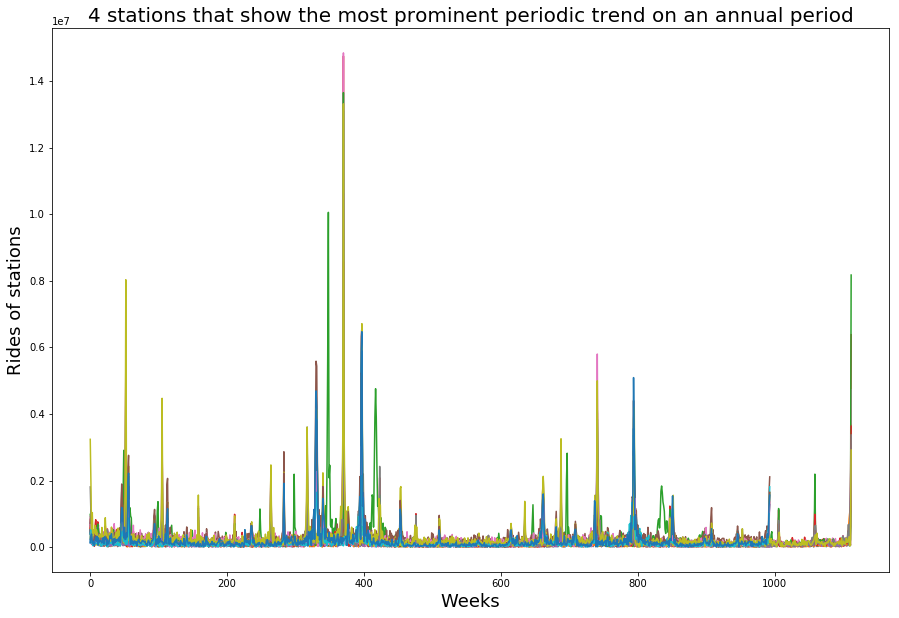

In [65]:
plt.figure(figsize=(15,10))
for i in TopPeriod:
    plt.plot(i[1:])
    
#year = [i * 52 for i in range(4)]
#[pl.axvline(i, c = 'k') for i in year]
plt.xlabel('Weeks', fontsize=18)
plt.ylabel('Rides of stations', fontsize=18)
plt.title('4 stations that show the most prominent periodic trend on an annual period', fontsize=20)
plt.legend(loc = 1)
plt.show();

In [66]:
len(TopPeriod)

21

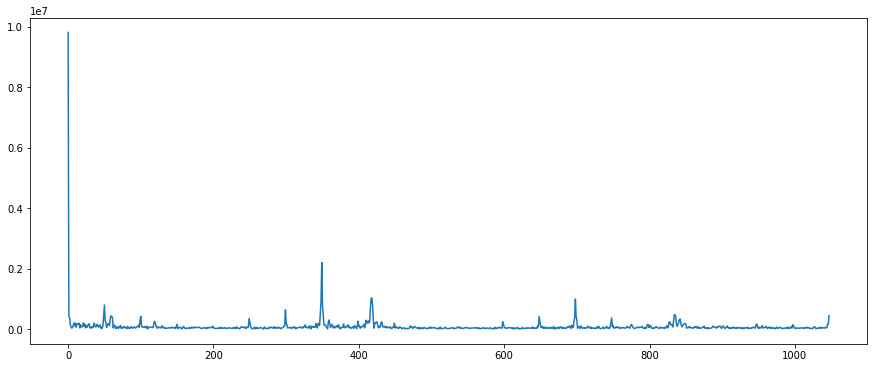

In [43]:
plt.plot(TopPeriod[1])

In [68]:
1.0/4

0.25

In [69]:
1.0/24/4

0.010416666666666666

In [71]:
1.0/52

0.019230769230769232

In [ ]:
f[4] = 0.020